# MLOps Lab test 1

### Aarti Shinde (2302)
### Gaurav Sawant (2318)

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [26]:
df=pd.read_csv('..//data/raw/DataSet1 - DataSet1.csv',encoding='latin1')

In [27]:
df.head()

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22-05-2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14-03-2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15-08-2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16-03-2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28-06-2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [28]:
df.shape

(608, 18)

In [29]:
df.columns

Index(['Day of Week', 'Director', 'Genre', 'Movie Title', 'Release Date',
       'Studio', 'Adjusted Gross ($mill)', 'Budget ($mill)', 'Gross ($mill)',
       'IMDb Rating', 'MovieLens Rating', 'Overseas ($mill)', 'Overseas%',
       'Profit ($mill)', 'Profit%', 'Runtime (min)', 'US ($mill)',
       'Gross % US'],
      dtype='object')

In [30]:
df.describe()

,Budget ($mill),IMDb Rating,MovieLens Rating,Overseas%,Profit%,Runtime (min),US ($mill),Gross % US
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,92.467928,6.923849,3.340378,57.698849,719.278783,117.781250,167.135197,42.301151
std,59.421407,0.925890,0.454071,12.334237,1942.807248,23.179122,92.465903,12.334237
min,0.600000,3.600000,1.490000,17.200000,7.700000,30.000000,0.000000,0.000000
25%,45.000000,6.375000,3.037500,49.900000,201.850000,100.000000,106.950000,33.700000
50%,80.000000,6.900000,3.365000,58.200000,338.550000,116.000000,141.700000,41.800000
75%,130.000000,7.600000,3.672500,66.300000,650.100000,130.250000,202.100000,50.100000
max,300.000000,9.200000,4.500000,100.000000,41333.300000,238.000000,760.500000,82.800000


In [31]:
null_counts = df.isnull().sum()
null_counts

Day of Week               0
Director                  0
Genre                     0
Movie Title               0
Release Date              0
Studio                    0
Adjusted Gross ($mill)    0
Budget ($mill)            0
Gross ($mill)             0
IMDb Rating               0
MovieLens Rating          0
Overseas ($mill)          0
Overseas%                 0
Profit ($mill)            0
Profit%                   0
Runtime (min)             0
US ($mill)                0
Gross % US                0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Day of Week             608 non-null    object 
 1   Director                608 non-null    object 
 2   Genre                   608 non-null    object 
 3   Movie Title             608 non-null    object 
 4   Release Date            608 non-null    object 
 5   Studio                  608 non-null    object 
 6   Adjusted Gross ($mill)  608 non-null    object 
 7   Budget ($mill)          608 non-null    float64
 8   Gross ($mill)           608 non-null    object 
 9   IMDb Rating             608 non-null    float64
 10  MovieLens Rating        608 non-null    float64
 11  Overseas ($mill)        608 non-null    object 
 12  Overseas%               608 non-null    float64
 13  Profit ($mill)          608 non-null    object 
 14  Profit%                 608 non-null    fl

There are 608 movie titles that are available in this dataset.


In [33]:
# len(df['Movie Title'])

In [34]:
# convert Profit, Gross and Overseas from object a float
cols = ["Adjusted Gross ($mill)","Gross ($mill)", "Overseas ($mill)","Profit ($mill)"]
df[cols] = df[cols].replace({'\,': ''}, regex=True).astype(float)

In [35]:
# df['Release Date'] = pd.to_datetime(df['Release Date'], format='%d-%m-%Y')

In [36]:
df['year'] = pd.to_datetime(df['Release Date']).dt.year

print('Number of year in the dataset:', len(df['year'].unique()))
print(sorted(df['year'].unique()))

Number of year in the dataset: 45
[1939, 1961, 1967, 1972, 1973, 1975, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


In [37]:
# Explore the Studio variable
print('Number of Studios in the dataset', len(df.Studio.unique()))
df.Studio.unique()

Number of Studios in the dataset 36


array(['Buena Vista Studios', 'Lionsgate', 'Sony', 'Universal',
       'Paramount Pictures', 'WB', 'Weinstein Company',
       'UA Entertainment', 'WB/New Line', 'New Line Cinema', 'Fox',
       'TriStar', 'Relativity Media', 'Screen Gems', 'StudioCanal',
       'Fox Searchlight Pictures', 'MiraMax', 'Path_ Distribution',
       'DreamWorks', 'Lionsgate Films', 'Revolution Studios',
       'Dimension Films', 'USA', 'Lionsgate/Summit',
       'Sony Picture Classics', 'Pacific Data/DreamWorks', 'Disney',
       'Art House Studios', 'Colombia Pictures', 'Gramercy Pictures',
       'Summit Entertainment', 'Vestron Pictures', 'MGM', 'Orion', 'IFC',
       'New Market Films'], dtype=object)

In [38]:
# Explore the variable Genre
print('Number of Genres in the dataset', len(df.Genre.unique()))
df.Genre.unique()
# There are about 15 different movie genres in this dataset

Number of Genres in the dataset 15


array(['action', 'comedy', 'adventure', 'horror', 'animation',
       'biography', 'drama', 'musical', 'sci-fi', 'crime', 'romance',
       'fantasy', 'mystery', 'thriller', 'documentary'], dtype=object)

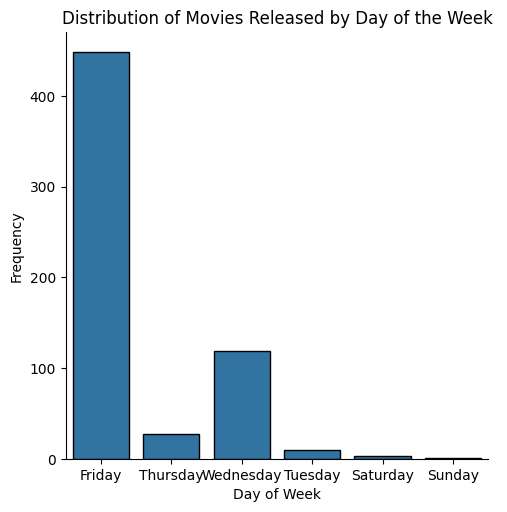

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

vis1 = sns.catplot(data=df, x='Day of Week', kind='count', height=5, edgecolor='black')
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.title('Distribution of Movies Released by Day of the Week')
plt.show()


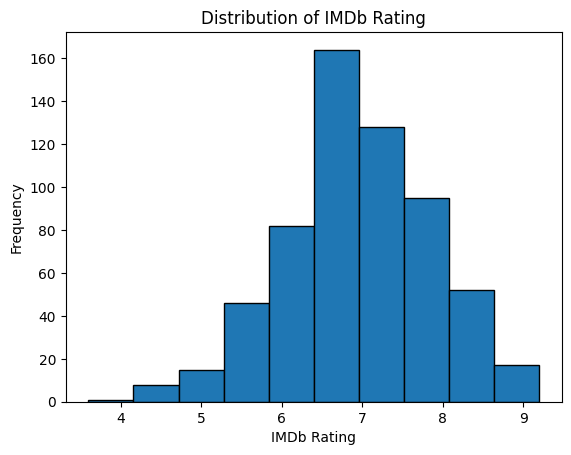

In [40]:
# Visualize the distribution of IMDb Rating
plt.hist(df['IMDb Rating'], bins=10, edgecolor='black')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.title('Distribution of IMDb Rating')
plt.show()

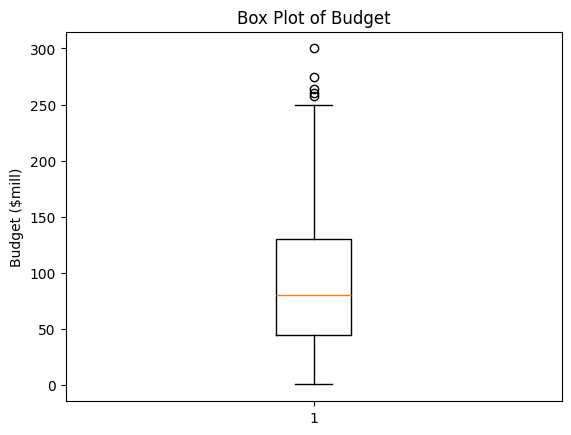

In [41]:

# Visualize the box plot of Budget
plt.boxplot(df['Budget ($mill)'])
plt.ylabel('Budget ($mill)')
plt.title('Box Plot of Budget')
plt.show()

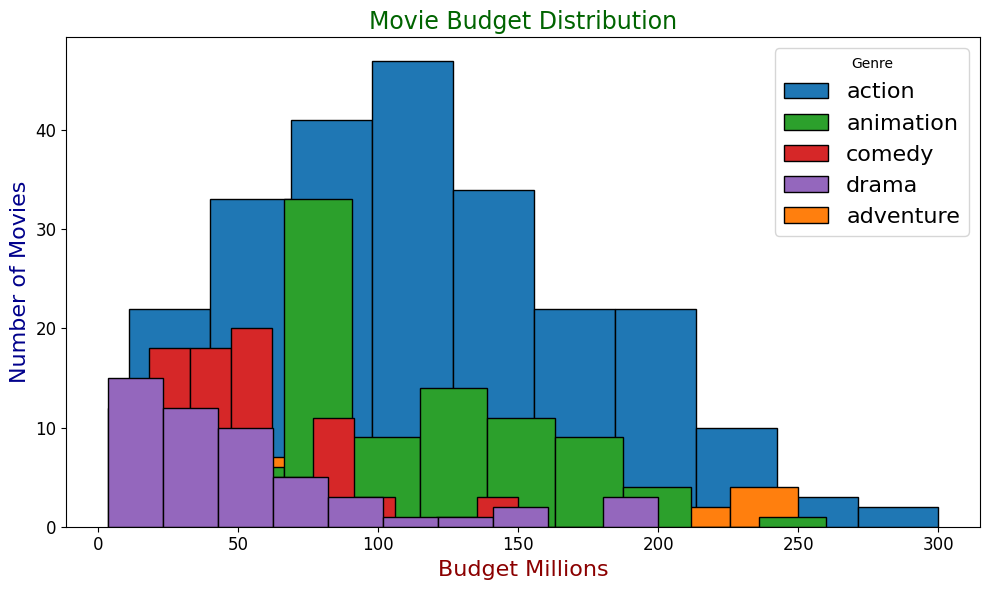

In [42]:
# Create the histogram plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Iterate over each genre and plot the histogram
for genre in genre_filter:
    plt.hist(df[df["Genre"] == genre]["Budget ($mill)"], bins=10, edgecolor="black", label=genre)

# Sort the legends based on their count
handles, labels = plt.gca().get_legend_handles_labels()
counts = [sum(df["Genre"] == genre) for genre in labels]
sorted_labels = [label for _, label in sorted(zip(counts, labels), reverse=True)]
sorted_handles = [handle for _, handle in sorted(zip(counts, handles), reverse=True)]

plt.xlabel("Budget Millions", color="DarkRed", size=16)
plt.ylabel("Number of Movies", color="DarkBlue", size=16)
plt.title("Movie Budget Distribution", color="DarkGreen", size=17, ha="center")
plt.legend(handles=sorted_handles, labels=sorted_labels, title="Genre", fontsize=16)

# Customize the plot appearance
plt.xticks(size=12)
plt.yticks(size=12)
plt.tight_layout()

plt.show()


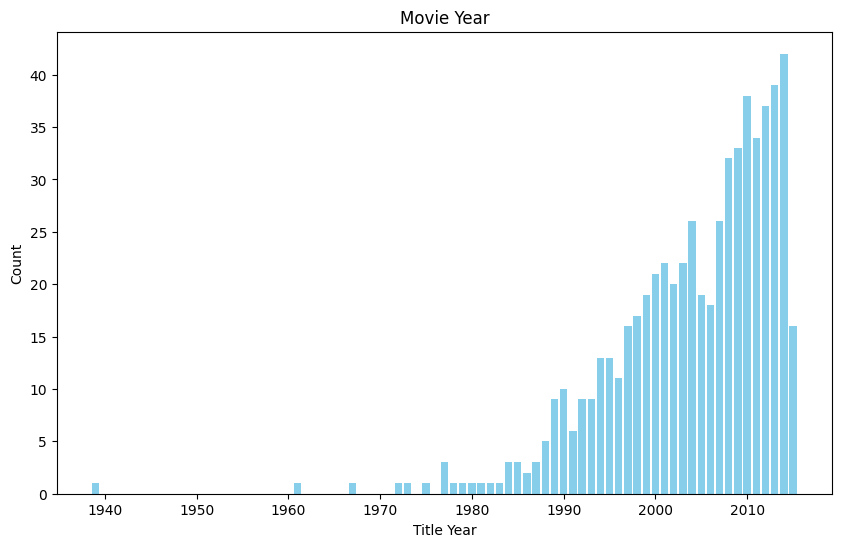

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6))
plt.bar(df['year'].value_counts().index, df['year'].value_counts().values, color='skyblue')
plt.xlabel('Title Year')
plt.ylabel('Count')
plt.title('Movie Year')
plt.show()
#We can see the most of the movies which are released after 1980

##### Top 20 directors based on the IMDB ratings


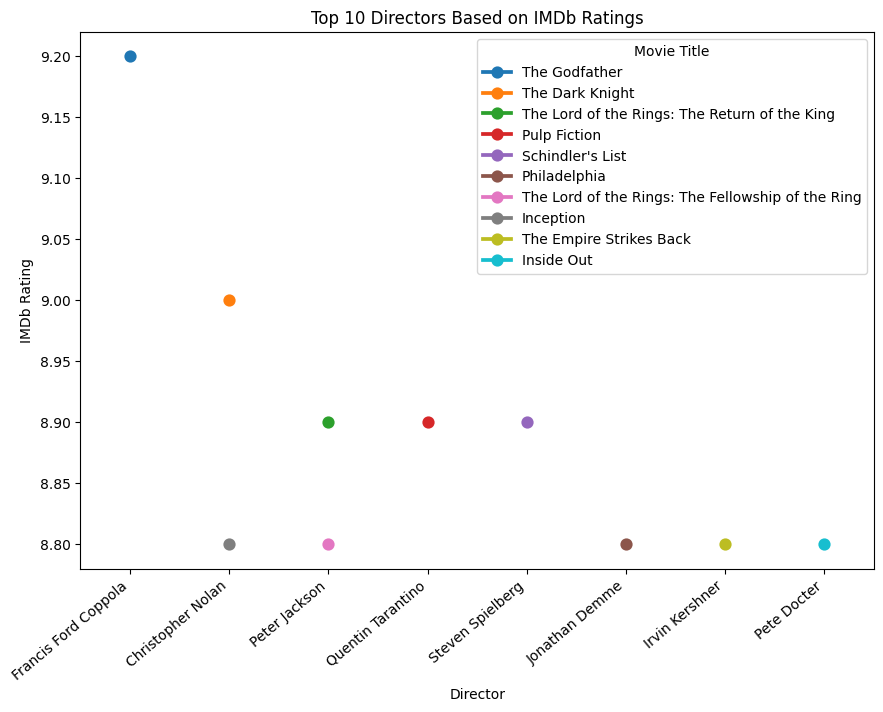

In [44]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 7))


data = df.sort_values(by='IMDb Rating', ascending=False)

# Select the top 20 movies based on IMDb rating
data_top = data.head(10)

# Create a point plot showing director vs. IMDb rating for the top 20 movies
ax = sns.pointplot(x='Director', y='IMDb Rating', hue='Movie Title', data=data_top)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('Top 10 Directors Based on IMDb Ratings')
plt.xlabel('Director')
plt.ylabel('IMDb Rating')
plt.show()


In [45]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(10, 8))

# # Assuming 'data_top' contains the top 10 movies for each director sorted by IMDb rating
# ax = sns.barplot(x='Director', y='IMDb Rating', data=data_top, ci=None)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# plt.title('Average IMDb Ratings of Top 10 Movies by Director')
# plt.xlabel('Director')
# plt.ylabel('Average IMDb Rating')
# plt.tight_layout()
# plt.show()


Average rating column

In [46]:
# Applying transformation to MovieLens Rating column
df['MovieLens Rating'] = df['MovieLens Rating'] * 2

#finding the average ratings 
df.insert(10, column='Avg_rating', value=df.loc[:, ['IMDb Rating', 'MovieLens Rating']].mean(axis=1))

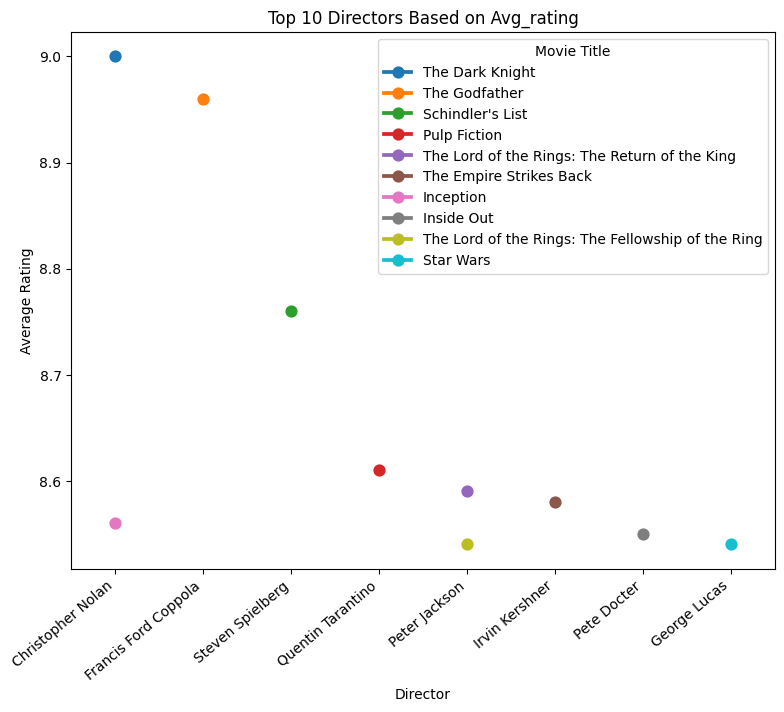

In [47]:
#Top 20 directors based on the IMDB ratings

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 7))


df = df.sort_values(by='Avg_rating', ascending=False)

# Select the top 20 movies based on IMDb rating
data_top = df.head(10)

# Create a point plot showing director vs. IMDb rating for the top 20 movies
ax = sns.pointplot(x='Director', y='Avg_rating', hue='Movie Title', data=data_top)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('Top 10 Directors Based on Avg_rating')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.show()


Top 5 studios

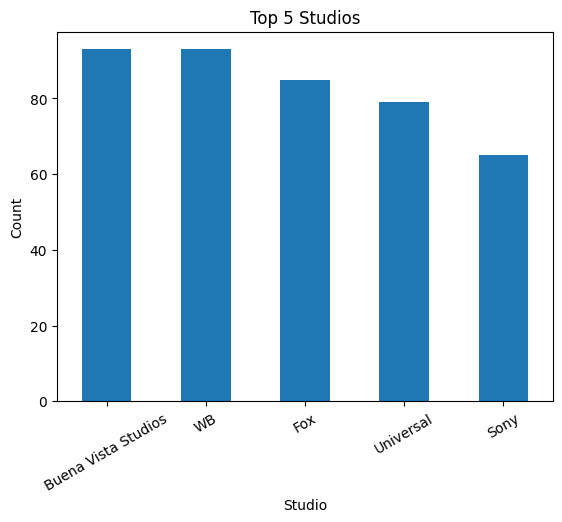

In [48]:
# Top 5 studios
df.groupby('Studio').size().nlargest().plot(kind='bar', title='Top 5 Studios')
plt.xticks(rotation=30)
plt.ylabel('Count')  # Add y-axis label
plt.show()


##### Runtime analysis

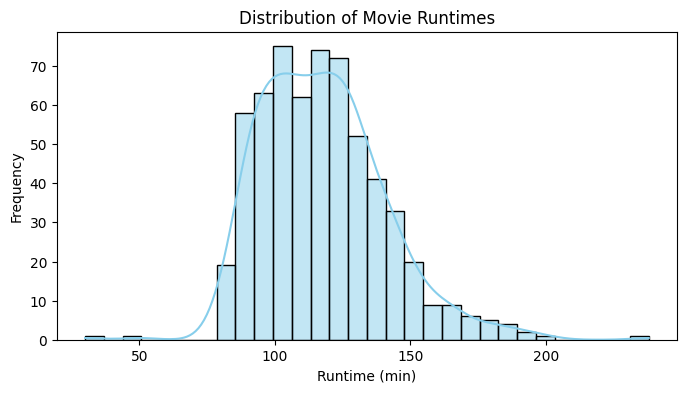

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Runtime (min)' column exists in your DataFrame 'data'

# Create a distribution plot for the 'Runtime (min)' column
plt.figure(figsize=(8, 4))
sns.histplot(df['Runtime (min)'], kde=True, color='skyblue')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (min)')
plt.ylabel('Frequency')
plt.show()


##### Average Runtime by Genre

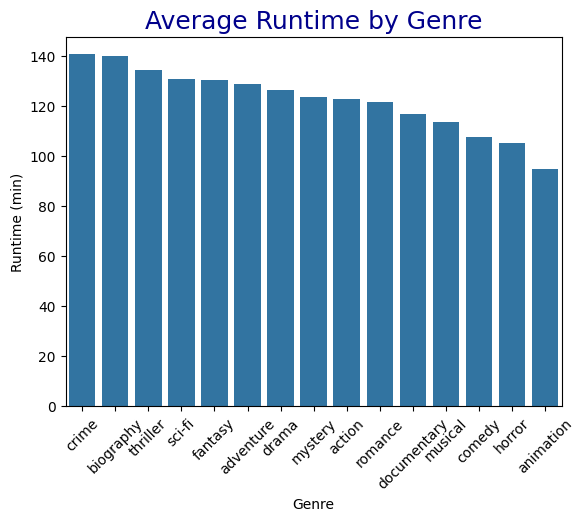

In [50]:


# Calculate the average runtime by genre
runtime = df.groupby('Genre')['Runtime (min)'].mean().sort_values(ascending=False).reset_index()

# Create a bar plot
ax = sns.barplot(x="Genre", y="Runtime (min)", data=runtime)

# Rotate the x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Set the title and adjust its color and font size
plt.title("Average Runtime by Genre", color='darkblue', fontsize=18)

# Display the plot with rotated x-axis labels
plt.xticks(rotation=45)
plt.show()


##### Average profit by genre

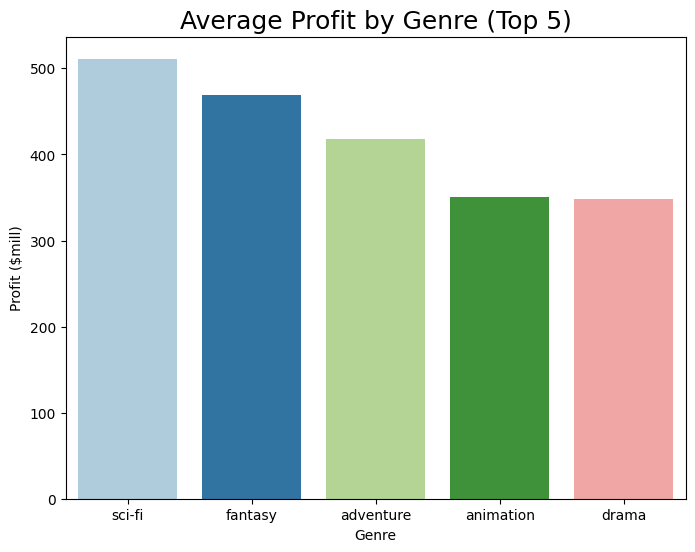

In [51]:

# Convert 'Profit ($mill)' to numeric type if it's not already
df['Profit ($mill)'] = pd.to_numeric(df['Profit ($mill)'], errors='coerce')

# Calculate the average profit by genre for the top genres
profitGenre = df.groupby('Genre')['Profit ($mill)'].mean().nlargest(5).reset_index()

genre_colors = sns.color_palette('Paired', n_colors=len(profitGenre))

# Create a bar plot
plt.figure(figsize=(8, 6))  # Adjust the figure size
sns.barplot(x='Genre', y='Profit ($mill)', data=profitGenre, palette=genre_colors)

# Set the title and adjust its color and font size
plt.title("Average Profit by Genre (Top 5)", fontsize=18)

# Display the bar plot
plt.show()


##### Average budget by genre

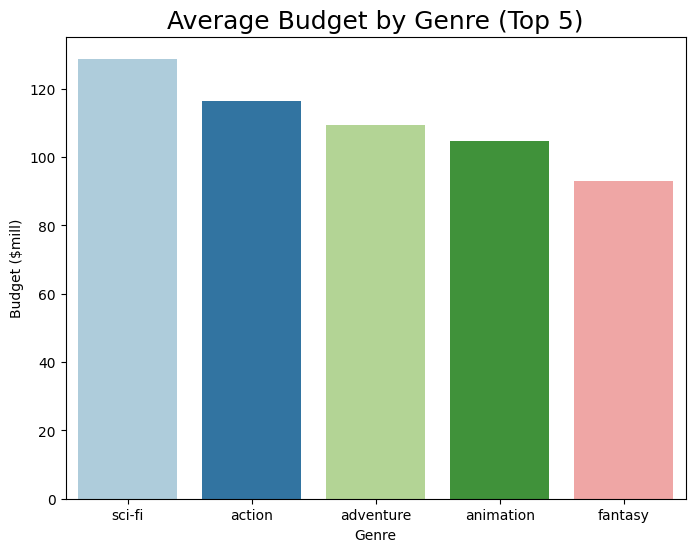

In [52]:

# Convert 'Profit ($mill)' to numeric type if it's not already
# df['Budget ($mill)'] = pd.to_numeric(df['Budget ($mill)'], errors='coerce')

# Calculate the average profit by genre for the top genres
profitGenre = df.groupby('Genre')['Budget ($mill)'].mean().nlargest(5).reset_index()

genre_colors = sns.color_palette('Paired', n_colors=len(profitGenre))

# Create a bar plot
plt.figure(figsize=(8, 6))  # Adjust the figure size
sns.barplot(x='Genre', y='Budget ($mill)', data=profitGenre, palette=genre_colors)

# Set the title and adjust its color and font size
plt.title("Average Budget by Genre (Top 5)", fontsize=18)

# Display the bar plot
plt.show()


##### Top ten best-rated movies

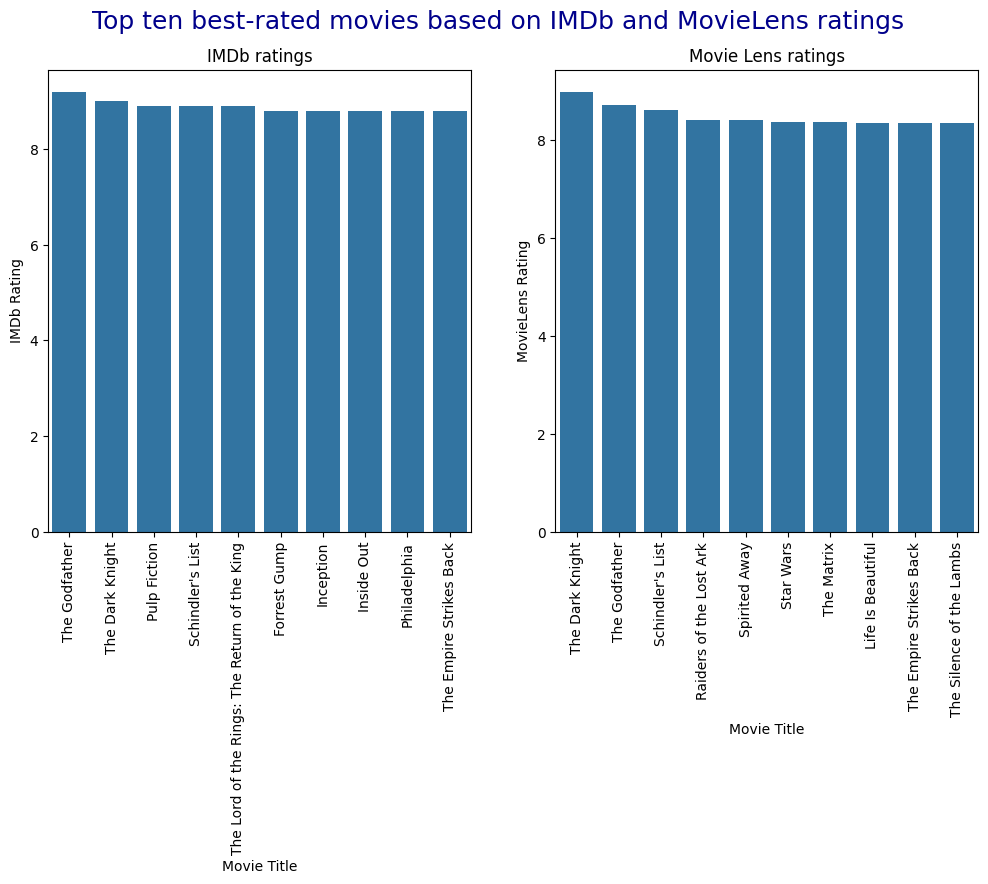

In [53]:
# Top ten best-rated movies based on IMDb and MovieLens ratings
imdbRating = df.groupby('Movie Title')['IMDb Rating'].mean().nlargest(10).reset_index()
movieLensRating = df.groupby('Movie Title')['MovieLens Rating'].mean().nlargest(10).reset_index()

# Create subplots for IMDb and MovieLens ratings
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
imdb_plot = sns.barplot(x="Movie Title", y="IMDb Rating", data=imdbRating, ax=axes[0])
movielens_plot = sns.barplot(x="Movie Title", y="MovieLens Rating", data=movieLensRating, ax=axes[1])

# Rotate x-axis labels for better readability
for ax in axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)

# Set titles for the subplots
axes[0].set_title("IMDb ratings")
axes[1].set_title("Movie Lens ratings")

# Set the overall title for the plot
fig.suptitle('Top ten best-rated movies based on IMDb and MovieLens ratings', fontsize=18, color='darkblue')

plt.show()


#The Godfather and The Dark Knight were the most rated on IMDb and Movie Lens respectively.



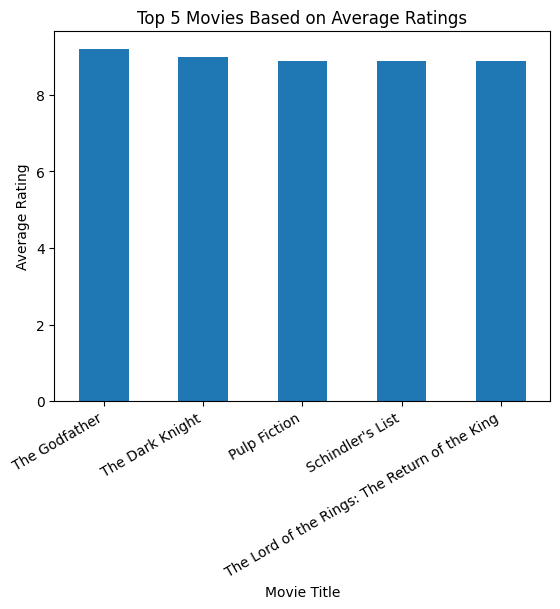

In [54]:
# Assuming 'df' contains the DataFrame with movie data including 'Movie Title' and 'IMDb Rating' columns

# Calculate average ratings for each movie
avg_ratings = df.groupby('Movie Title')['IMDb Rating'].mean()

# Select the top 5 movies based on average ratings
top_5_movies = avg_ratings.nlargest(5)

# Plotting the top 5 movies based on average ratings
top_5_movies.plot(kind='bar', title='Top 5 Movies Based on Average Ratings')
plt.ylabel('Average Rating')
plt.xlabel('Movie Title')
plt.xticks(rotation=30, ha='right')
plt.show()


In [55]:
df.Genre.unique()

array(['action', 'crime', 'biography', 'fantasy', 'sci-fi', 'animation',
       'thriller', 'drama', 'adventure', 'comedy', 'romance', 'horror',
       'documentary', 'musical', 'mystery'], dtype=object)

In [56]:
df['Genre'].value_counts()

Genre
action         236
animation       97
comedy          91
drama           52
adventure       50
sci-fi          16
thriller        15
biography       14
crime           10
horror           8
fantasy          6
romance          6
mystery          3
documentary      2
musical          2
Name: count, dtype: int64

In [57]:
df.Studio.unique()

array(['WB', 'Paramount Pictures', 'Universal', 'MiraMax',
       'New Line Cinema', 'Fox', 'Buena Vista Studios', 'Orion',
       'Weinstein Company', 'DreamWorks', 'TriStar',
       'Pacific Data/DreamWorks', 'Sony', 'Fox Searchlight Pictures',
       'MGM', 'Sony Picture Classics', 'USA', 'Colombia Pictures',
       'Lionsgate', 'Gramercy Pictures', 'Lionsgate Films',
       'Path_ Distribution', 'Lionsgate/Summit', 'Disney',
       'UA Entertainment', 'WB/New Line', 'IFC', 'New Market Films',
       'Vestron Pictures', 'StudioCanal', 'Revolution Studios',
       'Art House Studios', 'Screen Gems', 'Relativity Media',
       'Summit Entertainment', 'Dimension Films'], dtype=object)

In [58]:
df['Studio'].value_counts()

Studio
WB                          93
Buena Vista Studios         93
Fox                         85
Universal                   79
Sony                        65
Paramount Pictures          62
New Line Cinema             16
Pacific Data/DreamWorks     16
DreamWorks                  14
MiraMax                     10
TriStar                     10
MGM                          8
Lionsgate                    6
Weinstein Company            6
Colombia Pictures            5
WB/New Line                  5
Fox Searchlight Pictures     4
Lionsgate/Summit             4
Summit Entertainment         4
Screen Gems                  2
Revolution Studios           2
Disney                       2
UA Entertainment             2
Gramercy Pictures            2
Orion                        2
Path_ Distribution           1
Lionsgate Films              1
IFC                          1
New Market Films             1
Vestron Pictures             1
StudioCanal                  1
Art House Studios            1
U

## Top 6 Studio

In [59]:
top6_studio=['Buena Vista Studios','Fox','Paramount Pictures','Sony','Universal','WB']
studio_df=df[df.Studio.isin(top6_studio)]

In [60]:
studio_df.Studio.unique()

array(['WB', 'Paramount Pictures', 'Universal', 'Fox',
       'Buena Vista Studios', 'Sony'], dtype=object)

## Top 5 Genre


In [61]:
genre_filter =['action','adventure','animation','comedy','drama']
genre_df=studio_df[studio_df.Genre.isin(genre_filter)]

In [62]:
genre_df.Genre.unique()

array(['action', 'animation', 'drama', 'adventure', 'comedy'],
      dtype=object)

In [63]:
sns.set(style="whitegrid")

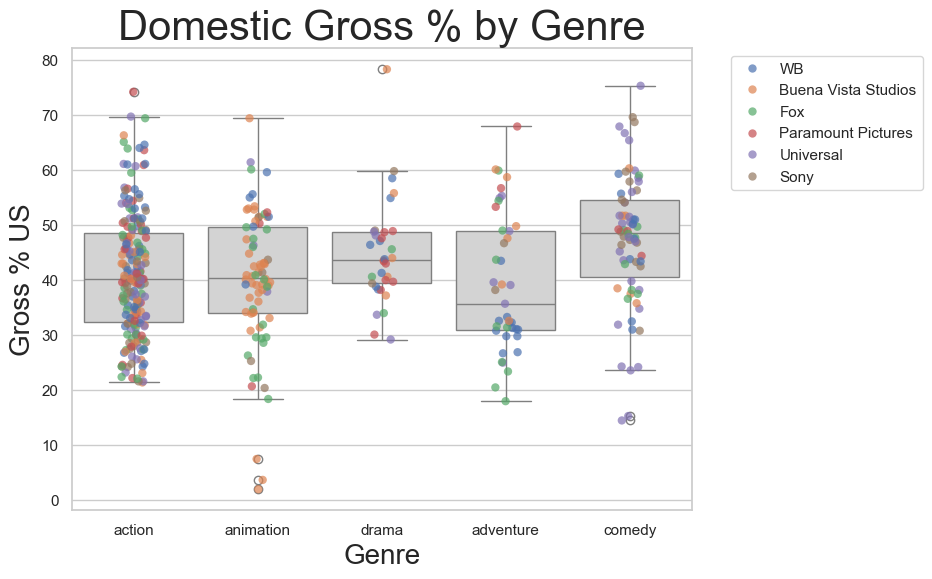

In [64]:
plt.figure(figsize=(8, 6))  # Increase the figure size to 8x6
ax = sns.boxplot(data=genre_df, x='Genre', y='Gross % US', orient='v', color='lightgray')
plt.setp(ax.artists, alpha=0.5)
sns.stripplot(x='Genre', y='Gross % US', data=genre_df, hue='Studio', jitter=True, size=6, alpha=0.7)
ax.axes.set_title('Domestic Gross % by Genre', fontsize=30)
ax.set_xlabel('Genre', fontsize=20)
ax.set_ylabel('Gross % US', fontsize=20)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()


## Sweetviz

In [65]:
# import the required libraries 
import sweetviz as sv
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

print("SweetViz Version : {}".format(sv.__version__))


SweetViz Version : 2.3.1


In [66]:
import sweetviz as sv

# Assuming df is your DataFrame
report = sv.analyze(df)

# Save the report to an HTML file
# report.show_html("data_report.html")


Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


In [ ]:
import pandas as pd

# Load the dataset
df=pd.read_csv('..//data/raw/DataSet1 - DataSet1.csv',encoding='latin1')

# Preprocess 
df['Release Date'] = pd.to_datetime(df['Release Date'], format='%d-%m-%Y')

df['Budget ($mill)'] = df['Budget ($mill)'].astype(str).str.replace(',', '').astype(float)

df['Gross ($mill)'] = df['Gross ($mill)'].astype(str).str.replace(',', '').astype(float)

top6_studio = ['Buena Vista Studios', 'Fox', 'Paramount Pictures', 'Sony', 'Universal', 'WB']
genre_filter = ['action', 'adventure', 'animation', 'comedy', 'drama']

# Filter the DataFrame based on the specified studios
studio_df = df[df['Studio'].isin(top6_studio)]

# Further filter based on the specified genres
genre_df = studio_df[studio_df['Genre'].isin(genre_filter)]

# Save the preprocessed data in a new file
# preprocessed_file_path = '..//data/processed/DataSet1 - DataSet1.csv'
df.to_csv(preprocessed_file_path, index=False)

<br>